In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob
from collections import Counter

In [2]:
ls

All Throws - Charts.ipynb        Possession + Passes Stats.ipynb
Centering Passes.ipynb           completion_pct.ipynb
Individual Player Stats.ipynb    passing_matrix.ipynb
Lineup Data.ipynb                scoring_maps.ipynb
Make a frisbee field plot.ipynb


In [3]:
cd ..

/Users/maxcohen/Documents/blueprint-stats


### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [4]:
#give file path abbreviation
poss_path_abbr = 'library/possessions/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

In [5]:
poss_df.head()

,Created,Point,Possession,Started point on offense?,Scored?,Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,opponent
0,2020-02-26 20:24:33,1,1,0,0,0.187023,0.822740,Andrew Edelman,4,NaN,NaN,NaN,Andrew Edelman,NaN,NaN,HIP
1,2020-02-26 20:26:03,2,1,1,1,0.704198,0.802260,Victor Kao,5,Ian McInerney,Jeff Voss,Gabe Stump,NaN,NaN,NaN,HIP
2,2020-02-26 20:27:57,4,1,1,1,0.498092,0.786017,Owen Marschall,7,Sam Pollack,Odie,Jeff Voss,NaN,NaN,NaN,HIP
3,2020-02-26 20:30:04,6,1,1,0,0.492366,0.822740,Owen Marschall,3,NaN,NaN,NaN,Gabe Stump,NaN,NaN,HIP
4,2020-02-26 20:32:02,7,1,0,1,0.251908,0.807203,Zero,2,Zero,Odie,Sam Alston,NaN,NaN,NaN,HIP


### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [6]:
#give file path abbreviation
passes_path_abbr = 'library/passes/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

In [7]:
passes_df.head()

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,From sideline?,To sideline?,Distance (m),Forward distance (m),Left-to-right distance (m),Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),End X (0 -> 1 = left sideline -> right sideline),End Y (0 -> 1 = back of opponent endzone -> back of own endzone),opponent
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,0,11.115858,4.943502,-9.956108,0.265267,0.816384,0.534351,0.766949,Lost Boys
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,0,0,5.945641,1.624298,5.719467,0.534351,0.766949,0.379771,0.750706,Lost Boys
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,0,0,14.086006,6.497174,-12.498092,0.379771,0.750706,0.717557,0.685734,Lost Boys
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,0,0,8.952368,4.802257,7.555344,0.717557,0.685734,0.513359,0.637712,Lost Boys
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,0,0,7.909012,-3.954798,6.849237,0.513359,0.637712,0.328244,0.677260,Lost Boys


### MERGE THE PASSES_DF WITH THE POSS_DF

In [8]:
passes_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,From sideline?,To sideline?,Distance (m),Forward distance (m),Left-to-right distance (m),Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),End X (0 -> 1 = left sideline -> right sideline),End Y (0 -> 1 = back of opponent endzone -> back of own endzone),opponent
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,0,11.115858,4.943502,-9.956108,0.265267,0.816384,0.534351,0.766949,Lost Boys
1,2020-02-26 22:56:39,1,1,Max Cohen,Victor Kao,0,0,0,0,0,...,0,0,5.945641,1.624298,5.719467,0.534351,0.766949,0.379771,0.750706,Lost Boys
2,2020-02-26 22:56:46,1,1,Victor Kao,Carter Thallon,0,0,0,0,0,...,0,0,14.086006,6.497174,-12.498092,0.379771,0.750706,0.717557,0.685734,Lost Boys
3,2020-02-26 22:56:49,1,1,Carter Thallon,Odie,0,0,0,0,0,...,0,0,8.952368,4.802257,7.555344,0.717557,0.685734,0.513359,0.637712,Lost Boys
4,2020-02-26 22:56:55,1,1,Odie,Carter Thallon,0,0,0,0,0,...,0,0,7.909012,-3.954798,6.849237,0.513359,0.637712,0.328244,0.677260,Lost Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-02-18 19:01:10,14,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,0,0,13.593741,6.638420,-11.862596,0.278626,0.725282,0.599237,0.658898,Lantern
64,2020-02-18 19:01:19,14,1,Max Cohen,Sam Pollack,0,0,0,0,0,...,0,1,14.655134,10.946327,-9.744274,0.599237,0.658898,0.862595,0.549435,Lantern
65,2020-02-18 19:01:25,14,1,Sam Pollack,Jeff Voss,0,0,0,0,0,...,1,1,13.413019,13.276836,-1.906489,0.862595,0.549435,0.914122,0.416667,Lantern
66,2020-02-18 19:01:29,14,1,Jeff Voss,Carter Thallon,0,0,0,0,0,...,1,0,15.534251,15.324858,2.541987,0.914122,0.416667,0.845420,0.263418,Lantern


In [9]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])

In [10]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [11]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [12]:
#create a unique posession index based on opponent, point#, possession#
for x in full_poss_df.index:
    full_poss_df.loc[x,'possession_index'] = full_poss_df.loc[x,'opponent'] + ' | ' + \
    str(full_poss_df.loc[x,'Point']) + '.' + \
    str(full_poss_df.loc[x,'Possession'])

In [13]:
#write to CSV
full_poss_df.to_csv('library/possessions/BP_2019_Full_Possession_Data.csv')

In [14]:
full_poss_df[full_poss_df['Assist?'] == 1]

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
6,2020-02-26 22:57:04,1,1,Odie,Eliot Bemis,0,0,0,1,1,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
8,2020-02-26 22:58:09,2,1,Josh Imhoff,Sam Alston,0,0,0,1,1,...,1,Andrew Edelman,2,Andrew Edelman,Josh Imhoff,Sam Alston,NaN,NaN,NaN,Lost Boys | 2.1
40,2020-02-26 23:12:11,5,2,Ruozhou Ye,Josh Imhoff,0,0,0,1,1,...,1,Andrew Edelman,5,Jesse Gan,Ruozhou Ye,Josh Imhoff,NaN,NaN,NaN,Lost Boys | 5.2
47,2020-02-26 23:14:51,6,2,Jeff Voss,Jon Kwan,0,0,0,1,1,...,1,Ruozhou Ye,5,Ruozhou Ye,Jeff Voss,Jon Kwan,NaN,NaN,NaN,Lost Boys | 6.2
49,2020-02-26 23:15:56,7,1,Jon Kwan,Andrew Edelman,0,0,0,1,1,...,1,Ruozhou Ye,2,Ruozhou Ye,Jon Kwan,Andrew Edelman,NaN,NaN,NaN,Lost Boys | 7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2020-02-18 18:49:28,6,1,Andrew Edelman,Swan,0,0,0,1,1,...,1,Alon Brown,2,Alon Brown,Andrew Edelman,Swan,NaN,NaN,NaN,Lantern | 6.1
1139,2020-02-18 18:54:13,8,4,Max Cohen,Carter Thallon,0,0,0,1,1,...,1,Max Cohen,1,NaN,Max Cohen,Carter Thallon,NaN,NaN,NaN,Lantern | 8.4
1152,2020-02-18 18:57:57,10,2,Carter Thallon,Sam Pollack,0,0,0,1,1,...,1,Geo Zheng,7,Jeff Voss,Carter Thallon,Sam Pollack,NaN,NaN,NaN,Lantern | 10.2
1157,2020-02-18 19:00:03,12,2,Max Cohen,Odie,0,0,0,1,1,...,1,Max Cohen,1,NaN,Max Cohen,Odie,NaN,NaN,NaN,Lantern | 12.2


### CREATE CHARTS

In [15]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out', 'possession_index'],
      dtype='object')

In [16]:
sorted(set(full_poss_df['Thrower']))

['Alon Brown',
 'Andrew Edelman',
 'Ben West',
 'Carter Thallon',
 'Carter Wang',
 'Eliot Bemis',
 'Evan Ma',
 'Gabe Stump',
 'Geo Zheng',
 'Ian McInerney',
 'Jeff Voss',
 'Jesse Gan',
 'Jon Kwan',
 'Josh Imhoff',
 'Juleon Robinson',
 'Max Cohen',
 'Nadav Pearl',
 'Odie',
 'Owen Marschall',
 'Ruozhou Ye',
 'Sam Alston',
 'Sam Feder',
 'Sam Pollack',
 'Stouf',
 'Swan',
 'Towell',
 'Victor Kao',
 'Zero']

In [17]:
#input player name
player_name = None

In [18]:
#input offense/defense
off_def = None

In [19]:
#potential filters to create
#offense vs defense
#opponent
#scored vs didn't score

In [20]:
#set filter by player name
if player_name == None:
    #all of the data
    player_filt = (full_poss_df['Thrower'].isin(set(full_poss_df['Thrower'])))
    threrror_player_filt = (full_poss_df['Thrower'].isin(set(full_poss_df['Thrower'])))
    recerror_player_filt = (full_poss_df['Thrower'].isin(set(full_poss_df['Thrower'])))
else:
    #limit data to only frames where player name is in thrower or receiver column
    player_filt = ((full_poss_df['Thrower'] == player_name) | (full_poss_df['Receiver'] == player_name))
    threrror_player_filt = (full_poss_df['Thrower'] == player_name)
    recerror_player_filt = (full_poss_df['Receiver'] == player_name)

In [21]:
#set filter by line name
if off_def == None:
    #all of the data
    off_def_filt = ((full_poss_df['Started point on offense?'] == 1) | 
                    (full_poss_df['Started point on offense?'] == 0))
elif off_def.lower() == 'offense':
    #only include offense points
    off_def_filt = (full_poss_df['Started point on offense?'] == 1)
else:
    #only include non-offense points
    off_def_filt = (full_poss_df['Started point on offense?'] == 0)

In [22]:
#regular passes
pass_df = full_poss_df[(full_poss_df['Assist?'] == 0) & (full_poss_df['Turnover?'] == 0) & 
                       (full_poss_df['Secondary assist?'] == 0) & player_filt & off_def_filt]
#thrower errors
thr_error_df = full_poss_df[(full_poss_df['Thrower error?'] == 1) & threrror_player_filt & off_def_filt]
#receiver errors
rec_error_df = full_poss_df[(full_poss_df['Receiver error?'] == 1) & recerror_player_filt & off_def_filt]
#secondary assists
sec_assist_df = full_poss_df[(full_poss_df['Secondary assist?'] == 1) & player_filt & off_def_filt]
#scores
score_df = full_poss_df[(full_poss_df['Assist?'] == 1) & player_filt & off_def_filt]

In [29]:
def draw_field(figsize=(4/1.2,11/1.2), color='black', lw=2):
    
    fig = plt.figure(figsize=figsize)
    
    #attacking endzone line
    x1 = [0,1]
    y1 = [.8181818,.8181818]
    att_ezline = plt.plot(x1,y1,color=color,lw=lw,alpha=.3)

    #defending endzone line
    x2 = [0,1]
    y2 = [.1818181,.1818181]
    def_ezline = plt.plot(x2,y2,color=color,lw=lw,alpha=.3)

    #backhand sideline
    x3 = [0,0]
    y3 = [0,1]
    bh_side = plt.plot(x3,y3,color=color,lw=lw)

    #flick sideline
    x4 = [1,1]
    y4 = [0,1]
    fl_side = plt.plot(x4,y4,color=color,lw=lw)

    #attacking backline
    x5 = [0,1]
    y5 = [1,1]
    att_bline = plt.plot(x5,y5,color=color,lw=lw)

    #defending backline
    x6 = [0,1]
    y6 = [0,0]
    def_bline = plt.plot(x6,y6,color=color,lw=lw)

    xtick = .25/2
    ytick = .181818/2

    xmarkers = plt.xticks(ticks=[xtick,xtick*2,xtick*3,xtick*4,xtick*5,xtick*6,xtick*7],
              labels=[5,10,15,20,15,10,5])
    ymarkers = plt.yticks(ticks=[ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9],
              labels=[0,10,20,30,40,50,60,'Goal'])

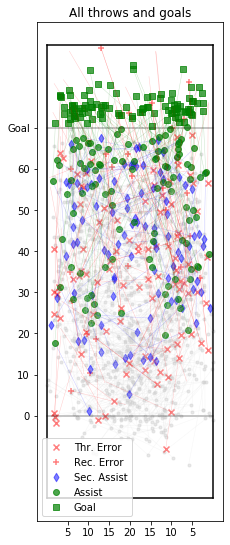

In [23]:
draw_field()

#normal throws
plt.scatter(pass_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-pass_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='lightgrey',
            marker='.',
           alpha=.5)
pass_xstart = pass_df['Start X (0 -> 1 = left sideline -> right sideline)']
pass_ystart = 1-pass_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
pass_xend = pass_df['End X (0 -> 1 = left sideline -> right sideline)']
pass_yend = 1-pass_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([pass_xstart,pass_xend],[pass_ystart,pass_yend],
         c='lightgrey',
         alpha=.2,
         linewidth=.5)

#thrower error
plt.scatter(thr_error_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-thr_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='r',
            marker='x',
           alpha=.5,
           label='Thr. Error')
threrror_xstart = thr_error_df['Start X (0 -> 1 = left sideline -> right sideline)']
threrror_ystart = 1-thr_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
threrror_xend = thr_error_df['End X (0 -> 1 = left sideline -> right sideline)']
threrror_yend = 1-thr_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([threrror_xstart,threrror_xend],[threrror_ystart,threrror_yend],
         c='r',
         alpha=.2,
         linewidth=.5)

#receiver error
plt.scatter(rec_error_df['End X (0 -> 1 = left sideline -> right sideline)'],
           1-rec_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='r',
            marker='+',
           alpha=.5,
           label='Rec. Error')
recerror_xstart = rec_error_df['Start X (0 -> 1 = left sideline -> right sideline)']
recerror_ystart = 1-rec_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
recerror_xend = rec_error_df['End X (0 -> 1 = left sideline -> right sideline)']
recerror_yend = 1-rec_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([recerror_xstart,recerror_xend],[recerror_ystart,recerror_yend],
         c='r',
         alpha=.2,
         linewidth=.5)

#secondary assists
plt.scatter(sec_assist_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-sec_assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='b',
            marker='d',
           alpha=.5,
           label="Sec. Assist")
sec_xstart = sec_assist_df['Start X (0 -> 1 = left sideline -> right sideline)']
sec_ystart = 1-sec_assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
sec_xend = sec_assist_df['End X (0 -> 1 = left sideline -> right sideline)']
sec_yend = 1-sec_assist_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([sec_xstart,sec_xend],[sec_ystart,sec_yend],
         c='b',
         alpha=.2,
         linewidth=.5)

#all scores
plt.scatter(score_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-score_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='g',
            marker='o',
           alpha=.7,
           label='Assist')
score_xstart = score_df['Start X (0 -> 1 = left sideline -> right sideline)']
score_ystart = 1-score_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
score_xend = score_df['End X (0 -> 1 = left sideline -> right sideline)']
score_yend = 1-score_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([score_xstart,score_xend],[score_ystart,score_yend],
         c='g',
         alpha=.2,
         linewidth=.5)
plt.scatter(score_df['End X (0 -> 1 = left sideline -> right sideline)'],
           1-score_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='g',
            marker='s',
           alpha=.7,
           label='Goal')


#plt.xlabel()
#plt.ylabel()
plt.legend(loc='lower left')

#title plot based on filter inputs
if player_name is None and off_def is None:
    title = 'All throws and goals'
elif player_name is None and off_def is not None:
    title = 'All throws and goals - {}'.format(off_def)
elif player_name is not None and off_def is None:
    title = 'All throws and goals - {}'.format(player_name)
else:
    title = 'All throws and goals - {}.{}'.format(player_name,off_def)
plt.title(title)

plt.show()
fig.savefig('figs/{}.png'.format(title),dpi=500,bbox_inches='tight')

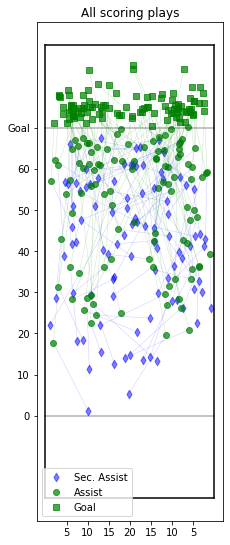

In [24]:
draw_field()

#secondary assists
plt.scatter(sec_assist_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-sec_assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='b',
            marker='d',
           alpha=.5,
           label='Sec. Assist')
sec_xstart = sec_assist_df['Start X (0 -> 1 = left sideline -> right sideline)']
sec_ystart = 1-sec_assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
sec_xend = sec_assist_df['End X (0 -> 1 = left sideline -> right sideline)']
sec_yend = 1-sec_assist_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([sec_xstart,sec_xend],[sec_ystart,sec_yend],
         c='b',
         alpha=.2,
         linewidth=.5)

#all scores
plt.scatter(score_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-score_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='g',
            marker='o',
           alpha=.7,
           label='Assist')
score_xstart = score_df['Start X (0 -> 1 = left sideline -> right sideline)']
score_ystart = 1-score_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
score_xend = score_df['End X (0 -> 1 = left sideline -> right sideline)']
score_yend = 1-score_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([score_xstart,score_xend],[score_ystart,score_yend],
         c='g',
         alpha=.2,
         linewidth=.5)
plt.scatter(score_df['End X (0 -> 1 = left sideline -> right sideline)'],
           1-score_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='g',
            marker='s',
           alpha=.7,
           label='Goal')


#plt.xlabel()
#plt.ylabel()
plt.legend(loc='lower left')
plt.title('All scoring plays')

plt.show()
fig.savefig('figs/scoring_plays_mapped.png',dpi=500,bbox_inches='tight')

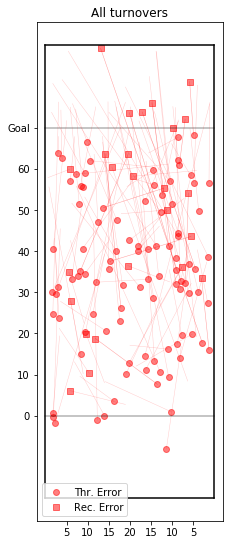

In [25]:
draw_field()


#thrower error
plt.scatter(thr_error_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-thr_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='r',
            marker='o',
           alpha=.5,
           label='Thr. Error')
threrror_xstart = thr_error_df['Start X (0 -> 1 = left sideline -> right sideline)']
threrror_ystart = 1-thr_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
threrror_xend = thr_error_df['End X (0 -> 1 = left sideline -> right sideline)']
threrror_yend = 1-thr_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([threrror_xstart,threrror_xend],[threrror_ystart,threrror_yend],
         c='r',
         alpha=.2,
         linewidth=.5)

#receiver error
plt.scatter(rec_error_df['End X (0 -> 1 = left sideline -> right sideline)'],
           1-rec_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='r',
            marker='s',
           alpha=.5,
           label='Rec. Error')
recerror_xstart = rec_error_df['Start X (0 -> 1 = left sideline -> right sideline)']
recerror_ystart = 1-rec_error_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
recerror_xend = rec_error_df['End X (0 -> 1 = left sideline -> right sideline)']
recerror_yend = 1-rec_error_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([recerror_xstart,recerror_xend],[recerror_ystart,recerror_yend],
         c='r',
         alpha=.2,
         linewidth=.5)

#plt.xlabel()
#plt.ylabel()
plt.legend(loc='lower left')
plt.title('All turnovers')

plt.show()
fig.savefig('figs/turnovers_mapped.png',dpi=500,bbox_inches='tight')

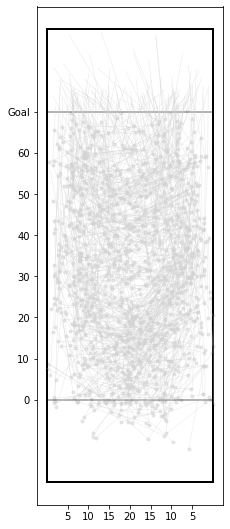

In [34]:
draw_field()

#normal throws
plt.scatter(full_poss_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='lightgrey',
            marker='.',
           alpha=.5)
pass_xstart = full_poss_df['Start X (0 -> 1 = left sideline -> right sideline)']
pass_ystart = 1-full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
pass_xend = full_poss_df['End X (0 -> 1 = left sideline -> right sideline)']
pass_yend = 1-full_poss_df['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([pass_xstart,pass_xend],[pass_ystart,pass_yend],
         c='lightgrey',
         alpha=.5,
         linewidth=.5)


#plt.xlabel()
#plt.ylabel()
#plt.legend(loc='lower left')

plt.show()
#fig.savefig('figs/{}.png'.format(title),dpi=500,bbox_inches='tight')

In [37]:
poss_score = full_poss_df[full_poss_df['Scored?']==1]
poss_turn = full_poss_df[full_poss_df['Scored?']==0]

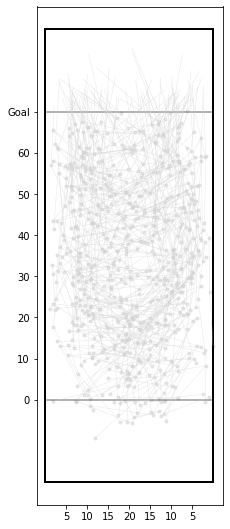

In [38]:
draw_field()

#normal throws
plt.scatter(poss_score['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-poss_score['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='lightgrey',
            marker='.',
           alpha=.5)
pass_xstart = poss_score['Start X (0 -> 1 = left sideline -> right sideline)']
pass_ystart = 1-poss_score['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
pass_xend = poss_score['End X (0 -> 1 = left sideline -> right sideline)']
pass_yend = 1-poss_score['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([pass_xstart,pass_xend],[pass_ystart,pass_yend],
         c='lightgrey',
         alpha=.5,
         linewidth=.5)


#plt.xlabel()
#plt.ylabel()
#plt.legend(loc='lower left')

plt.show()
#fig.savefig('figs/{}.png'.format(title),dpi=500,bbox_inches='tight')

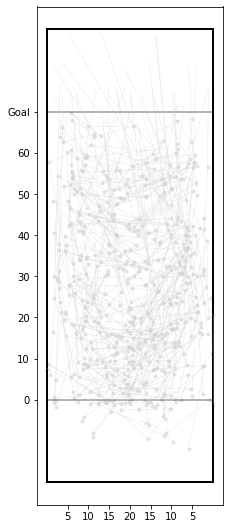

In [39]:
draw_field()

#normal throws
plt.scatter(poss_turn['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-poss_turn['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
            c='lightgrey',
            marker='.',
           alpha=.5)
pass_xstart = poss_turn['Start X (0 -> 1 = left sideline -> right sideline)']
pass_ystart = 1-poss_turn['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
pass_xend = poss_turn['End X (0 -> 1 = left sideline -> right sideline)']
pass_yend = 1-poss_turn['End Y (0 -> 1 = back of opponent endzone -> back of own endzone)']
plt.plot([pass_xstart,pass_xend],[pass_ystart,pass_yend],
         c='lightgrey',
         alpha=.5,
         linewidth=.5)


#plt.xlabel()
#plt.ylabel()
#plt.legend(loc='lower left')

plt.show()
#fig.savefig('figs/{}.png'.format(title),dpi=500,bbox_inches='tight')